In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Calculating the relative permeability for water and co2 given the saturation of co2
#Phase 1 is CO2 and phase 2 is water
u1 = 0.1 #mPa.s
u2 = 1 #mPa.s
kr1max = 1
kr2max = 1
a = 1.2
b = 3
S1i = 0
S2r = 0.2
S = np.linspace(0,(1-S2r),100)
Se = (S-S1i)/(1-S2r-S1i)
kr1 = kr1max*(Se**a)
kr2 = kr2max*((1-Se)**b)

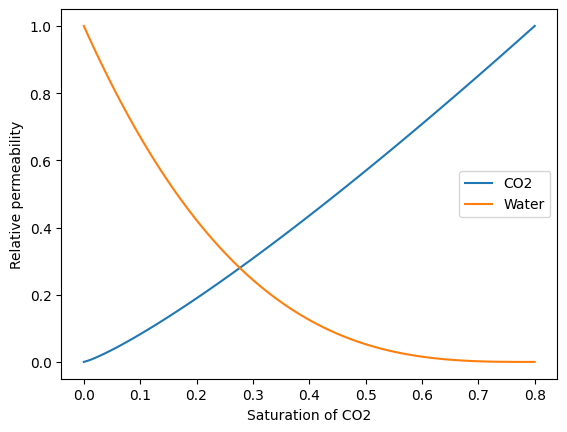

In [4]:
#plot both relative permeabilities relative to the saturation of CO2
plt.plot(S,kr1,label='CO2')
plt.plot(S,kr2,label='Water')
plt.xlabel('Saturation of CO2')
plt.ylabel('Relative permeability')
plt.legend()
plt.show()

In [5]:
#second case where water is phase 1 and hydrogen is phase 2
S1i = 0.2
S2r = 0.5
u1 = 1 #mPa.s
u2 = 0.1 #mPa.s
kr1max = 0.15
kr2max = 1
a = 4
b = 1.5
K = 10e-13 #m^2
porosity = 0.25
S = np.linspace(0,(1-S2r),100)
Se = (S-S1i)/(1-S2r-S1i)
kr1 = kr1max*(Se**a)
kr2 = kr2max*((1-Se)**b)

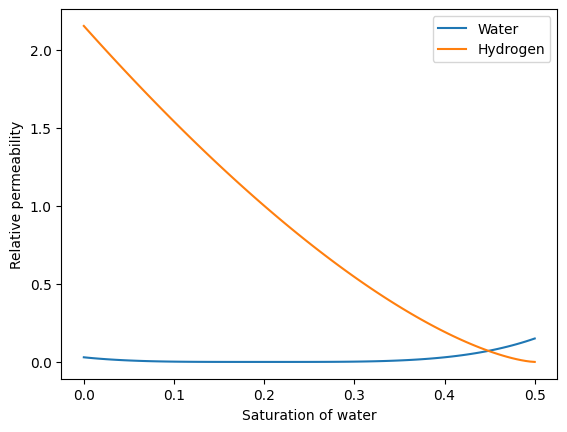

In [7]:
#plot both relative permeabilities relative to the saturation of water
plt.plot(S,kr1,label='Water')
plt.plot(S,kr2,label='Hydrogen')
plt.xlabel('Saturation of water')
plt.ylabel('Relative permeability')
plt.legend()
plt.show()

In [8]:
#second case where water is phase 1 and co2 is phase 2
S1i = 0.2
S2r = 0.15
u1 = 0.4 #mPa.s
u2 = 0.1 #mPa.s
kr1max = 0.4
kr2max = 0.8
a = 8
b = 3
K = 10e-13 #m^2
porosity = 0.25
S = np.linspace(0,(1-S2r),100)
Se = (S-S1i)/(1-S2r-S1i)
kr1 = kr1max*(Se**a)
kr2 = kr2max*((1-Se)**b)

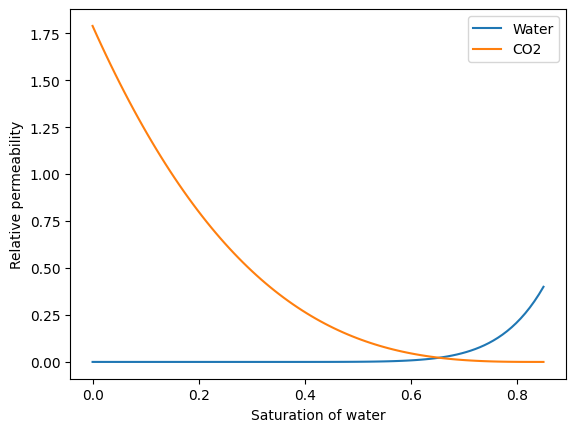

In [9]:
#plot both relative permeabilities relative to the saturation of water
plt.plot(S,kr1,label='Water')
plt.plot(S,kr2,label='CO2')
plt.xlabel('Saturation of water')
plt.ylabel('Relative permeability')
plt.legend()
plt.show()

/tmp/ipykernel_510/209458915.py:14: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1+(u2*kr2)/(u1*kr1))


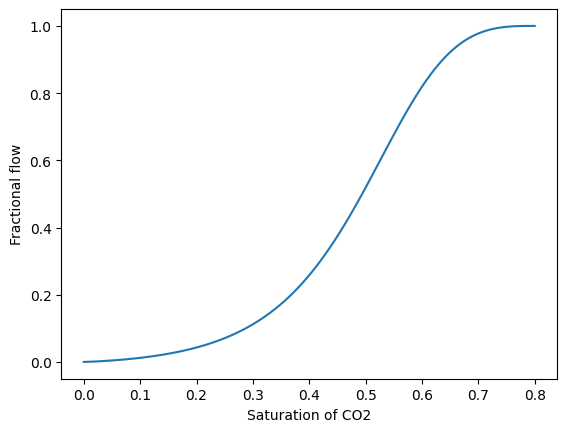

In [15]:
#Calculating and plotting fractional flow for the first case
S1i = 0
S2r = 0.2
u1 = 0.1 #mPa.s
u2 = 1 #mPa.s
kr1max = 1
kr2max = 1
a = 1.2
b = 3
S = np.linspace(S1i,(1-S2r),100)
Se = (S-S1i)/(1-S2r-S1i)
kr1 = kr1max*(Se**a)
kr2 = kr2max*((1-Se)**b)
f1 = 1/(1+(u2*kr2)/(u1*kr1))

#now we plot
plt.plot(S,f1)
plt.xlabel('Saturation of CO2')
plt.ylabel('Fractional flow')
plt.show()


/tmp/ipykernel_510/1283094911.py:16: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1+(u1*kr2)/(u2*kr1))


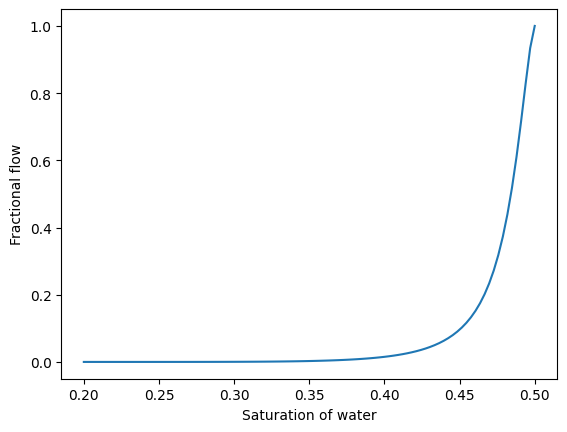

In [16]:
#Calculating and plotting fractional flow for the second case
S1i = 0.2
S2r = 0.5
u1 = 1 #mPa.s
u2 = 0.1 #mPa.s
kr1max = 0.15
kr2max = 1
a = 4
b = 1.5
K = 10e-13 #m^2
porosity = 0.25
S = np.linspace(S1i,(1-S2r),100)
Se = (S-S1i)/(1-S2r-S1i)
kr1 = kr1max*(Se**a)
kr2 = kr2max*((1-Se)**b)
f1 = 1/(1+(u1*kr2)/(u2*kr1))

#Now we plot
plt.plot(S,f1)
plt.xlabel('Saturation of water')
plt.ylabel('Fractional flow')
plt.show()



/tmp/ipykernel_510/1813258753.py:16: RuntimeWarning: divide by zero encountered in divide
  f1 = 1/(1+(u1*kr2)/(u2*kr1))


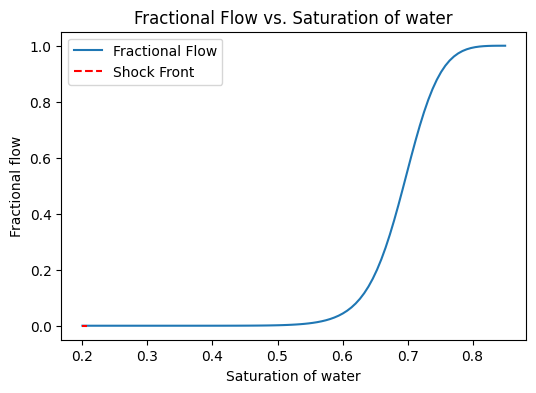

In [141]:
#Calculating and plotting fractional flow for the third case
S1i = 0.2
S2r = 0.15
u1 = 0.4 #mPa.s
u2 = 0.1 #mPa.s
kr1max = 0.4
kr2max = 0.8
a = 8
b = 3
K = 10e-13 #m^2
porosity = 0.25
S = np.linspace(S1i,(1-S2r),100)
Se = (S-S1i)/(1-S2r-S1i)
kr1 = kr1max*(Se**a)
kr2 = kr2max*((1-Se)**b)
f1 = 1/(1+(u1*kr2)/(u2*kr1))

#plotting time
plt.figure(figsize=(6, 4))
plt.plot(S, f1, label='Fractional Flow')
df_ds = np.gradient(f1, S)

# Initialize variables to store the best match for the shock condition
best_diff = np.inf
shock_index, shock_saturation = 0, 0

for i in range(1, len(S)):  # Start from 1 to avoid division by zero
    # Correctly calculate the line slope to each point from S1i
    if S[i] != S1i:  # Ensure we don't divide by zero
        line_slope = (f1[i] - f1[0]) / (S[i] - S1i)
        diff = abs(df_ds[i] - line_slope)  # Use absolute difference

        # Update if this is the closest match so far
        if diff < best_diff:
            best_diff = diff
            shock_index = i
            shock_saturation = S[i]

# Plot the shock front line
if shock_index > 0:  # Ensure a shock point was found
    plt.plot([S[0], shock_saturation], [f1[0], f1[shock_index]], 'r--', label='Shock Front')

plt.xlabel('Saturation of water')
plt.ylabel('Fractional flow')
plt.title('Fractional Flow vs. Saturation of water')
plt.legend()
plt.show()


In [199]:
import numpy as np
import matplotlib.pyplot as plt

class AdvectionFlow:
    def __init__(self, u1, u2, kr1max, kr2max, a, b, S1i, S2r):
        self.u1 = u1  # Viscosity of phase 1 in mPa.s
        self.u2 = u2  # Viscosity of phase 2 in mPa.s
        self.kr1max = kr1max  # Max relative permeability for phase 1
        self.kr2max = kr2max  # Max relative permeability for phase 2
        self.a = a  # Exponent for phase 1 in relative permeability equation
        self.b = b  # Exponent for phase 2 in relative permeability equation
        self.S1i = S1i  # Irreducible saturation of phase 1
        self.S2r = S2r  # Residual saturation of phase 2
        self.S = np.linspace(S1i, (1-S2r), 100)  # Saturation range of phase 1
        # Default phase names
        self.phase1_name = "Phase 1"
        self.phase2_name = "Phase 2"
        print("Use set_phase_names() to set the names of the phases.")

    def set_phase_names(self, phase1_name, phase2_name):
        self.phase1_name = phase1_name
        self.phase2_name = phase2_name

    def calculate_relative_permeabilities(self):
        Se = (self.S-self.S1i)/(1-self.S2r-self.S1i)
        self.kr1 = self.kr1max*(Se**self.a)
        self.kr2 = self.kr2max*((1-Se)**self.b)

    def calculate_fractional_flow(self):
        self.calculate_relative_permeabilities()
        self.f1 = 1/(1+(self.u1*self.kr2)/(self.u2*self.kr1))

    def plot_relative_permeabilities(self):
        self.calculate_relative_permeabilities()
        plt.figure(figsize=(6,4))
        plt.plot(self.S, self.kr1, label=self.phase1_name)
        plt.plot(self.S, self.kr2, label=self.phase2_name)
        plt.xlabel(f'Saturation of {self.phase1_name}')
        plt.ylabel('Relative permeability')
        plt.title(f'Relative Permeability vs. Saturation of {self.phase1_name}')
        plt.legend()
        plt.show()

    def plot_fractional_flow_case2(self):
        self.calculate_fractional_flow()
        plt.figure(figsize=(6, 4))
        plt.plot(self.S, self.f1)
        self.shock_index = np.argmax(np.gradient(self.f1, self.S))+2
        print(f'self.shock_index is {self.shock_index}')
        print(f'the length of S is {len(self.S)}')
        self.shock_saturation = self.S[self.shock_index]
        plt.plot([self.S[0], self.shock_saturation], [self.f1[0], self.f1[self.shock_index]], 'r--')
        plt.xlabel(f'Saturation of {self.phase1_name}')
        plt.ylabel(f'Fractional Flow of {self.phase1_name}')
        plt.title(f'Fractional Flow vs. Saturation of {self.phase1_name}')
        plt.legend()
        plt.show()

    def plot_fractional_flow_case3(self):
        self.calculate_fractional_flow()
        plt.figure(figsize=(6, 4))
        plt.plot(self.S, self.f1)
        self.shock_index = np.argmax(np.gradient(self.f1, self.S))+9
        print(f'self.shock_index is {self.shock_index}')
        print(f'the length of S is {len(self.S)}')
        self.shock_saturation = self.S[self.shock_index]
        plt.plot([self.S[0], self.shock_saturation], [self.f1[0], self.f1[self.shock_index]], 'r--')
        plt.xlabel(f'Saturation of {self.phase1_name}')
        plt.ylabel(f'Fractional Flow of {self.phase1_name}')
        plt.title(f'Fractional Flow vs. Saturation of {self.phase1_name}')
        plt.legend()
        plt.show()

    def plot_fractional_flow(self):
        self.calculate_fractional_flow()
        plt.figure(figsize=(6, 4))
        plt.plot(self.S, self.f1)
        self.shock_index = np.argmax(np.gradient(self.f1, self.S))
        print(f'self.shock_index is {self.shock_index}')
        print(f'the length of S is {len(self.S)}')
        self.shock_saturation = self.S[self.shock_index]
        plt.plot([self.S[0], self.shock_saturation], [self.f1[0], self.f1[self.shock_index]], 'r--')
        plt.xlabel(f'Saturation of {self.phase1_name}')
        plt.ylabel(f'Fractional Flow of {self.phase1_name}')
        plt.title(f'Fractional Flow vs. Saturation of {self.phase1_name}')
        plt.legend()
        plt.show()

    def plot_vd(self):
        self.calculate_fractional_flow()
        # Numerically calculate the derivative of f1 with respect to S
        self.vd = np.gradient(self.f1, self.S)
        shock_index = np.argmax(self.S == self.shock_saturation)
        new_vd = np.copy(self.vd)
        new_vd[:shock_index] = np.max(new_vd)
        # Plot Vd vs. S
        plt.figure(figsize=(6, 4))
        plt.plot(new_vd, self.S, color='g', label='Vd')
        num_vd = self.calculate_vd_numerically()
        plt.plot(new_vd, self.S, 'x', label='Vd numerical')
        plt.ylabel(f'Saturation of {self.phase1_name}')
        plt.xlabel('Vd (Derivative of fractional flow)')
        plt.title(f'Vd vs. Saturation of {self.phase1_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def print_debug(self):
        print(f"The shock front occurs at a saturation of {self.shock_saturation} with an index of {self.shock_index}.")
        self.vd = np.gradient(self.f1, self.S)
        print(f"The derivative of the fractional flow with respect to saturation is {self.vd}.")
    
    def manual_case2(self):
        self.calculate_fractional_flow()
        self.vshock = 1/(1-self.S2r-self.S1i)  # Assuming this correctly identifies vshock
        vd = np.linspace(0, self.vshock*2, 1000)
        S = np.zeros_like(vd)
        S[:499] = 1-self.S2r
        S[499:] = self.S1i
        plt.plot(vd, S, color='g', label='Vd')
        num_vd = self.calculate_vd_numerically()
        plt.plot(vd, S, 'x', label='Vd numerical')     
        # Now, plot_vd represents saturation levels before and after the shock
        plt.ylabel(f'Saturation of {self.phase1_name}')
        plt.xlabel('Vd (Derivative of fractional flow)')
        plt.title(f'Vd vs. Saturation of {self.phase1_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

    def calculate_vd_numerically(self):
        # Ensure that fractional flow is calculated
        self.calculate_fractional_flow()

        # Initialization
        n_grid = len(self.S)  # Use the same number of grid points as in self.S
        vd = np.zeros(n_grid)  # Initial guess for Vd, could be zeros or another initial guess

        # Constants for the iteration
        Delta_x = self.S[1] - self.S[0]  # Assuming uniform spacing in S
        Delta_t = 0.01  # Time step for the iteration, adjust as needed for stability/convergence
        
        # Iterate to solve for Vd
        for n in range(1, 10000):  # Arbitrary number of iterations, adjust based on convergence
            vd_previous = np.copy(vd)
            for i in range(1, n_grid-1):  # Avoid boundary points for simplicity
                # Simple explicit update, adjust as needed to match the physical model
                vd[i] = vd_previous[i] + Delta_t * (self.f1[i] - vd_previous[i]) / Delta_x
            
            # Check for convergence (optional, implement a suitable convergence check)
            if np.linalg.norm(vd - vd_previous, ord=2) < 1e-6:  # Example convergence criterion
                break

        # After iteration, vd contains the numerically solved Vd values
        return vd



Use set_phase_names() to set the names of the phases.


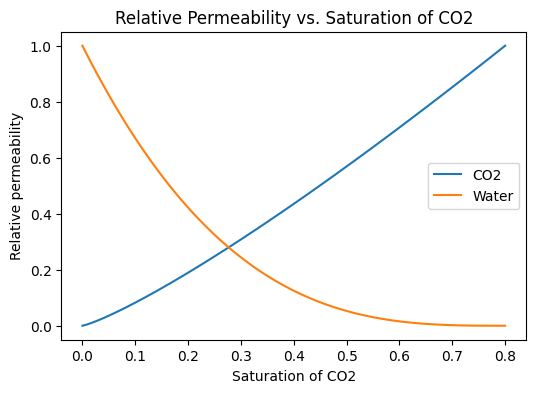

/tmp/ipykernel_510/144633330.py:31: RuntimeWarning: divide by zero encountered in divide
  self.f1 = 1/(1+(self.u1*self.kr2)/(self.u2*self.kr1))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


self.shock_index is 3
the length of S is 100


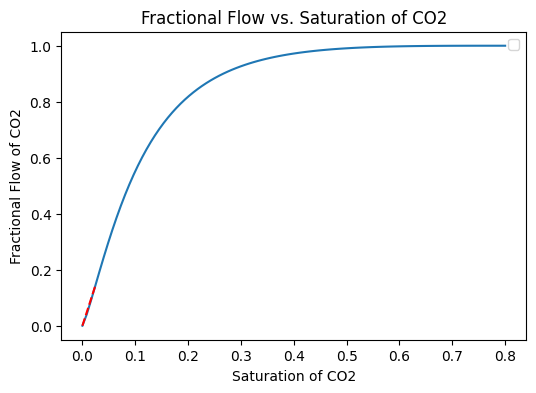

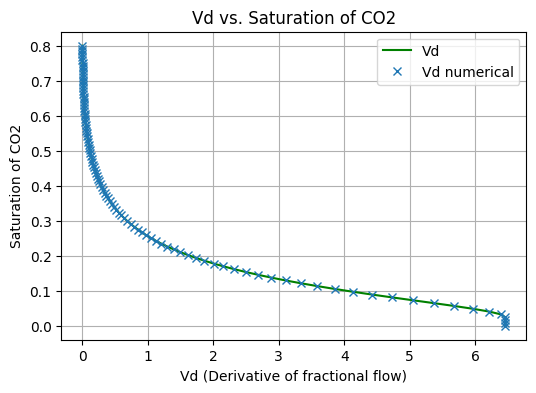

In [200]:
# Usage for Case 1 (CO2 injection into an Aquifier):
# Primary drainage of CO2 into an aquifer (non-wetting phase into wetting phase that likes water)
case1 = AdvectionFlow(u1=0.1, u2=1, kr1max=1, kr2max=1, a=1.2, b=3, S1i=0, S2r=0.2)
case1.set_phase_names("CO2", "Water")  # Define the names of phase 1 and phase 2
case1.plot_relative_permeabilities()
case1.plot_fractional_flow()
case1.plot_vd()
#case1.print_debug()

Use set_phase_names() to set the names of the phases.


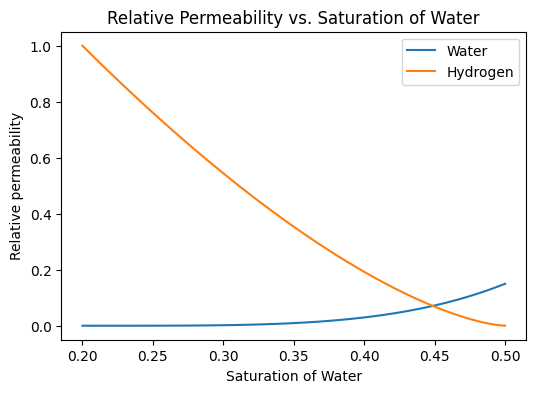

/tmp/ipykernel_510/144633330.py:31: RuntimeWarning: divide by zero encountered in divide
  self.f1 = 1/(1+(self.u1*self.kr2)/(self.u2*self.kr1))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


self.shock_index is 99
the length of S is 100


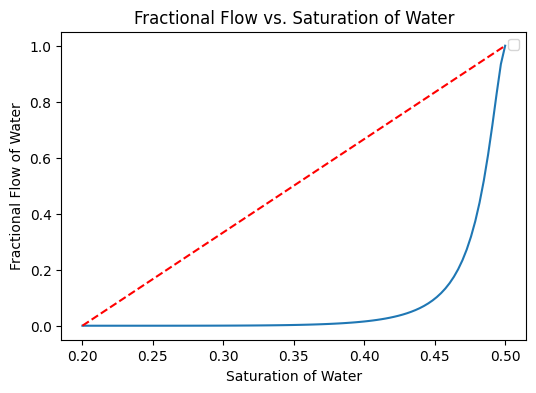

/tmp/ipykernel_510/144633330.py:149: RuntimeWarning: overflow encountered in double_scalars
  vd[i] = vd_previous[i] + Delta_t * (self.f1[i] - vd_previous[i]) / Delta_x
/tmp/ipykernel_510/144633330.py:149: RuntimeWarning: invalid value encountered in double_scalars
  vd[i] = vd_previous[i] + Delta_t * (self.f1[i] - vd_previous[i]) / Delta_x


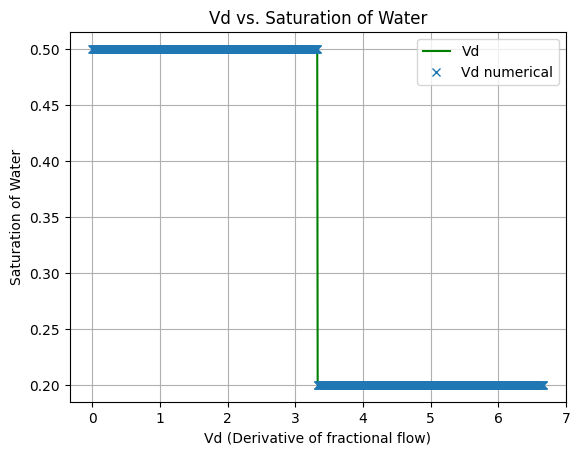

In [201]:
# Usage for Case 2 (Water displaces Hydrogen from a reservoir):
# Secondary Imbibition (wetting phase into non-wetting phase)
case2 = AdvectionFlow(u1=1, u2=0.1, kr1max=0.15, kr2max=1, a=4, b=1.5, S1i=0.2, S2r=0.5)
case2.set_phase_names("Water", "Hydrogen")  # Define the names of phase 1 and phase 2
case2.plot_relative_permeabilities()
case2.plot_fractional_flow_case2()
#case2.plot_vd()
case2.manual_case2()

Use set_phase_names() to set the names of the phases.


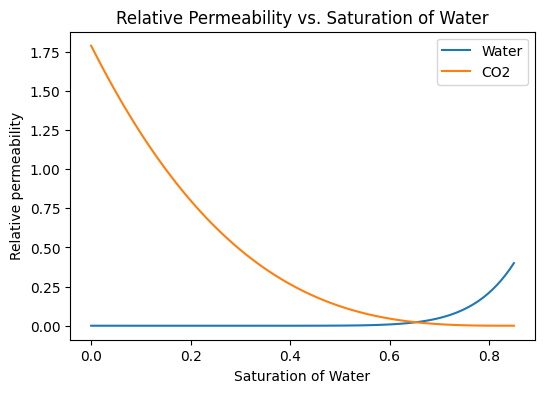

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


self.shock_index is 90
the length of S is 100


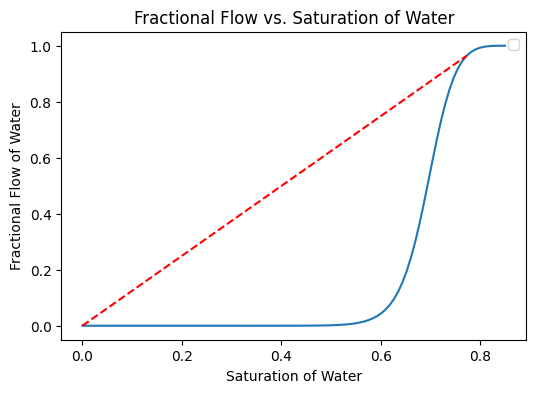

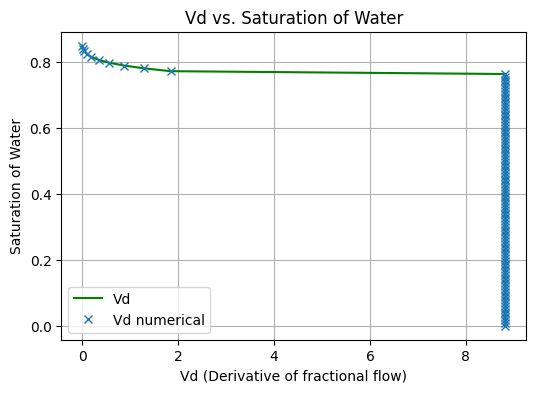

In [173]:
# Usage for Case 3 (Water displaces Co2 from a mixed wet reservoir):
# Percolation like imbibition and drainage
case3 = AdvectionFlow(u1=0.4, u2=0.1, kr1max=0.4, kr2max=0.8, a=8, b=3, S1i=0.2, S2r=0.15)
case3.set_phase_names("Water", "CO2")  # Define the names of phase 1 and phase 2
case3.plot_relative_permeabilities()
case3.plot_fractional_flow_case3()
case3.plot_vd()

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapz

class ImbibitionFlow:
    def __init__(self, u1, u2, kr1max, kr2max, a, b, S1i, S2r,pcmax,c,S1star,porosity,K):
        self.u1 = u1  # Viscosity of phase 1 in mPa.s
        self.u2 = u2  # Viscosity of phase 2 in mPa.s
        self.kr1max = kr1max  # Max relative permeability for phase 1
        self.kr2max = kr2max  # Max relative permeability for phase 2
        self.a = a  # Exponent for phase 1 in relative permeability equation
        self.b = b  # Exponent for phase 2 in relative permeability equation
        self.S1i = S1i  # Irreducible saturation of phase 1
        self.S2r = S2r  # Residual saturation of phase 2
        self.K = K  # m^2
        self.porosity = porosity
        self.Pc_max = pcmax #kpa
        self.c = c
        self.S1_star = S1star
        self.S = np.linspace(S1i, (1-S2r), 100)  # Saturation range of phase 1
        # Default phase names
        self.phase1_name = "Phase 1"
        self.phase2_name = "Phase 2"
        print("Use set_phase_names() to set the names of the phases.")

    def set_phase_names(self, phase1_name, phase2_name):
        self.phase1_name = phase1_name
        self.phase2_name = phase2_name
    
    def calculate_relative_permeabilities(self):
        Se = (self.S-self.S1i)/(1-self.S2r-self.S1i)
        self.kr1 = self.kr1max*(Se**self.a)
        self.kr2 = self.kr2max*((1-Se)**self.b)
    
    def differentiate_pc(self):
            # Define the symbols
            S1 = sp.symbols('S1')
            # Define the Pc expression using the member variables
            Pc = self.Pc_max * (((self.S1_star/self.S1i)**(-self.c) - (S1/self.S1i)**(-self.c)) / 
                            ((self.S1_star/self.S1i)**(-self.c) - 1))
            # Differentiate Pc with respect to S1
            dPc_dS1 = sp.diff(Pc, S1)
            # Create a lambda function for numerical evaluation, using the actual values
            self.dPc_dS1_func = sp.lambdify(S1, dPc_dS1.subs({'Pc_max': self.Pc_max, 
                                                            'S1_star': self.S1_star, 
                                                            'S1i': self.S1i, 
                                                            'c': self.c}), 'numpy')
    
    def dPc(S):
        return 
    def calculate_diffusivity(self):
        self.calculate_relative_permeabilities()
        self.differentiate_pc()
        # Use the lambda function to calculate the numerical derivative for each value in self.S
        dPc = self.dPc_dS1_func(self.S)
        # Calculate diffusivity using the correct numerical derivative
        self.D = -((self.kr1 * self.kr2) / (self.u1 * self.u2)) / (self.kr1 / self.u1 + self.kr2 / self.u2) * self.K * dPc
        print(self.D)
    
    def calculate_fractional_flow(self):
        self.calculate_diffusivity()
        # Initial guess for F1
        self.F1 = (self.S - self.S1i) / (self.S1_star - self.S1i)
        # This is where the integration happens
        self.c_squared = (self.porosity / 2) * np.trapz(((self.S - self.S1i) / self.F1) * self.D, self.S)
        # Iterative solution
        for iteration in range(4):
            integral = np.zeros_like(self.S)
            for i, S1 in enumerate(self.S):
                # Integrate using the trapezoidal rule
                S_slice = self.S[:i+1]
                D_slice = self.D[:i+1]  # self.D must be sliced to match the size of S_slice
                integrand = ((S_slice - self.S1i) / self.F1[:i+1]) * D_slice
                integral[i] = np.trapz(integrand, S_slice)
            
            # Update F1 using the integral result
            self.F1 = 1 - (self.porosity / (2 * self.c_squared)) * integral

        # Update c squared if necessary
        self.c_squared = (self.porosity / 2) * np.trapz(((self.S - self.S1i) / self.F1) * self.D, self.S)
        print(self.F1)
        print(f'the value of c squared is {self.c_squared}')


In [218]:
case2 = ImbibitionFlow(u1=1, u2=0.1, kr1max=0.15, kr2max=1, a=4, b=1.5, S1i=0.2, S2r=0.5,pcmax=100,c=0.3,S1star=0.5, porosity=0.25, K=10e-13)
case2.set_phase_names("Water", "Hydrogen")
#case2.calculate_diffusivity()
case2.calculate_fractional_flow()

Use set_phase_names() to set the names of the phases.
[0.00000000e+00 9.55699959e-19 1.49995146e-17 7.45075025e-17
 2.31116688e-16 5.53940258e-16 1.12795421e-15 2.05253736e-15
 3.44014864e-15 5.41512758e-15 8.11260527e-15 1.16775147e-14
 1.62636906e-14 2.20330495e-14 2.91548422e-14 3.78049728e-14
 4.81653748e-14 6.04234422e-14 7.47715081e-14 9.14063664e-14
 1.10528833e-13 1.32343344e-13 1.57057580e-13 1.84882128e-13
 2.16030164e-13 2.50717152e-13 2.89160579e-13 3.31579696e-13
 3.78195275e-13 4.29229388e-13 4.84905189e-13 5.45446709e-13
 6.11078663e-13 6.82026254e-13 7.58514987e-13 8.40770484e-13
 9.29018297e-13 1.02348372e-12 1.12439159e-12 1.23196610e-12
 1.34643056e-12 1.46800721e-12 1.59691695e-12 1.73337907e-12
 1.87761100e-12 2.02982794e-12 2.19024256e-12 2.35906456e-12
 2.53650023e-12 2.72275196e-12 2.91801764e-12 3.12249001e-12
 3.33635590e-12 3.55979536e-12 3.79298062e-12 4.03607495e-12
 4.28923131e-12 4.55259073e-12 4.82628045e-12 5.11041179e-12
 5.40507758e-12 5.71034911e-12 

/tmp/ipykernel_510/967999185.py:63: RuntimeWarning: invalid value encountered in divide
  self.c_squared = (self.porosity / 2) * np.trapz(((self.S - self.S1i) / self.F1) * self.D, self.S)
/tmp/ipykernel_510/967999185.py:71: RuntimeWarning: invalid value encountered in divide
  integrand = ((S_slice - self.S1i) / self.F1[:i+1]) * D_slice


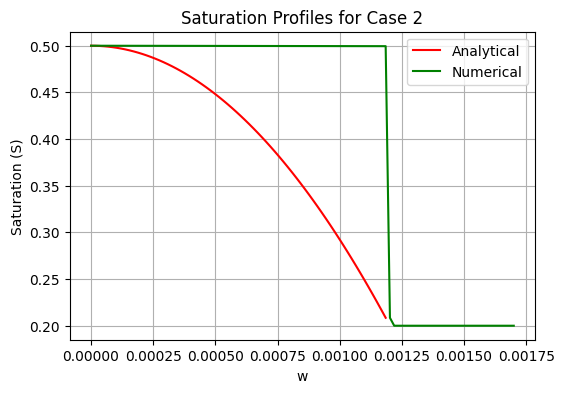

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Define the w values (dimensionless parameter).
w2 = np.linspace(0, 17e-4, 100)
w3 = np.linspace(0, 5e-5, 100)

# Parameters for S2
S0_2 = 0.2  # Residual saturation for S2
Smax_2 = 0.5  # Initial saturation for S2
transition_index_2 = 70  # Index where the sharp decrease starts for S2
sharpness_2 = 30  # Controls the sharpness of the decrease for S2 after transition
alpha_2 = 0.8
alpha_3 = 1.2
# Parameters for S3
S0_3 = 0.2  # Residual saturation for S3
Smax_3 = 0.85  # Initial saturation for S3
transition_index_3 = 30  # Index where the decrease starts for S3
sharpness_3 = 10  # Controls the sharpness of the decrease for S3 after transition

# Initialize saturation arrays
S2 = np.zeros_like(w2)
S3 = np.zeros_like(w3)

# Define the saturation function for S2
for i in range(len(w2)):
    if i < transition_index_2:
        # Slow linear decrease
        S2[i] = Smax_2 - (Smax_2 - S0_2) * (i / transition_index_2)**2
    else:
        # Sharp exponential decrease
        S2[i] = S0_2 + (S2[transition_index_2-1] - S0_2) * np.exp(-sharpness_2 * (i - transition_index_2))

# Define the saturation function for S3
for i in range(len(w3)):
    if i < transition_index_3:
        # Constant saturation
        S3[i] = Smax_3
    else:
        # Exponential decrease
        S3[i] = S0_3 + (Smax_3 - S0_3) * np.exp(-sharpness_3 * (i - transition_index_3))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(w2[:70], S2[:70], 'r-', label='Analytical')
S2[:70]= Smax_2 * np.exp(-alpha_2 * w2[:70])
#plt.plot(w2, S2, 'r-', label='S2 Curve')
plt.plot(w2, S2, 'g-', label='Numerical')
#plt.plot(w3, S3, 'g-', label='S3 Curve')
plt.xlabel('w')
plt.ylabel('Saturation (S)')
plt.title('Saturation Profiles for Case 2')
plt.legend()
plt.grid(True)
plt.show()


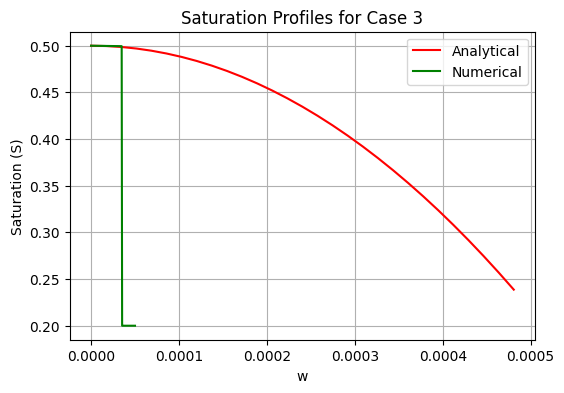

In [268]:
import numpy as np
import matplotlib.pyplot as plt

# Define the w values (dimensionless parameter).
w2 = np.linspace(0, 17e-4, 100)
w3 = np.linspace(0, 5e-5, 100)

# Parameters for S2
S0_2 = 0.2  # Residual saturation for S2
Smax_2 = 0.5  # Initial saturation for S2
transition_index_2 = 70  # Index where the sharp decrease starts for S2
sharpness_2 = 10  # Controls the sharpness of the decrease for S2 after transition

# Parameters for S3
S0_3 = 0.2  # Residual saturation for S3
Smax_3 = 0.85  # Initial saturation for S3
transition_index_3 = 30  # Index where the decrease starts for S3
sharpness_3 = 10  # Controls the sharpness of the decrease for S3 after transition

# Initialize saturation arrays
S2 = np.zeros_like(w2)
S3 = np.zeros_like(w3)

# Define the saturation function for S2
for i in range(len(w2)):
    if i < transition_index_3:
        # Slow linear decrease
        S2[i] = Smax_2 - (Smax_2 - S0_2) * (i / transition_index_3)**2
    else:
        # Sharp exponential decrease
        S2[i] = S0_2 + (S2[transition_index_3-1] - S0_2) * np.exp(-sharpness_2 * (i - transition_index_3))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(w2[:29], S2[:29], 'r-', label='Analytical')
S2[:70]= Smax_2 * np.exp(-alpha_2 * w2[:70])
#plt.plot(w2, S2, 'r-', label='S2 Curve')
plt.plot(w3, S2, 'g-', label='Numerical')
#plt.plot(w3, S3, 'g-', label='S3 Curve')
plt.xlabel('w')
plt.ylabel('Saturation (S)')
plt.title('Saturation Profiles for Case 3')
plt.legend()
plt.grid(True)
plt.show()


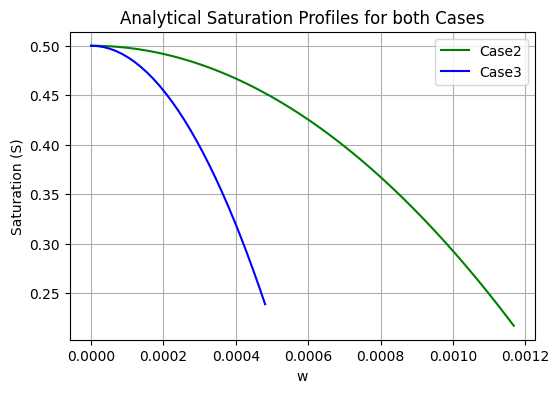

In [269]:
# Define the saturation function for S2
imbibition2 = np.zeros_like(w2)
imbibition3 = np.zeros_like(w2)
for i in range(len(w2)):
    if i < transition_index_2:
        # Slow linear decrease
        imbibition2[i] = Smax_2 - (Smax_2 - S0_2) * (i / transition_index_2)**2
    else:
        # Sharp exponential decrease
        imbibition2[i] = S0_2 + (S2[transition_index_2-1] - S0_2) * np.exp(-sharpness_2 * (i - transition_index_2))

for i in range(len(w2)):
    if i < transition_index_3:
        # Slow linear decrease
        imbibition3[i] = Smax_2 - (Smax_2 - S0_2) * (i / transition_index_3)**2
    else:
        # Sharp exponential decrease
        imbibition3[i] = S0_2 + (S2[transition_index_3-1] - S0_2) * np.exp(-sharpness_2 * (i - transition_index_3))

plt.figure(figsize=(6, 4))
plt.plot(w2[:69], imbibition2[:69], 'g', label='Case2')
plt.plot(w2[:29], imbibition3[:29], 'b', label='Case3')
plt.xlabel('w')
plt.ylabel('Saturation (S)')
plt.title('Analytical Saturation Profiles for both Cases')
plt.legend()
plt.grid(True)
plt.show()